In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
def Readfile(filename):
    a = open(filename, 'r')
    text = a.readlines()

    lines=[]
    for line in text:
        b = line.split()
        lines.append(b)
    T =[]
    for i in range(4,len(lines)-1):
        t= lines[i]
        T.append(t)
    Temp=[]
    Pos=[]
    for j in range(len(T)):
        p=float(T[j][1])
        q=float(T[j][3])
        Pos.append(p)
        Temp.append(q)
    return Pos, Temp

In [15]:
def values(filename):
    a = open(filename, 'r')
    text = a.readlines()

    lines=[]
    for line in text:
        b = line.split()
        lines.append(b)
    
    
    Val =[]
    
    for i in range(len(lines)):
        q= float(lines[i][0])
        Val.append(q)    
    return Val

In [23]:
theta_max = 30
number = int(theta_max/2 +1)
theta = np.linspace(0,theta_max,number)
#theta = [0,2,4,6,8,10,12,14,16,26,28,30]
Lx = np.array(values("length_x.dat"))*(10**(-10))*(2.5/2)
Ly = np.array(values("length_y.dat"))*(10**(-10))
z= 3.35*(10**(-10))                                        #Interlayer spacing
rt = np.array(values("res_thick_val.dat"))*(10**(-10))

In [24]:
time= np.array(values("time_val.dat"))*(10**(-12))
Qin=np.array(values("heat_in_val.dat"))*(1.6022*10**(-19))
Qout=np.array(values("heat_out_val.dat"))*(1.6022*10**(-19))

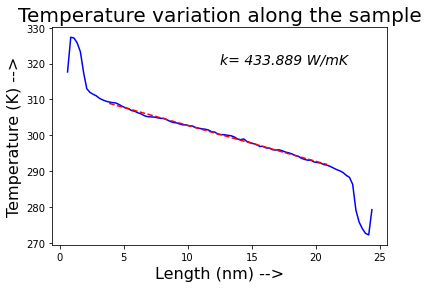

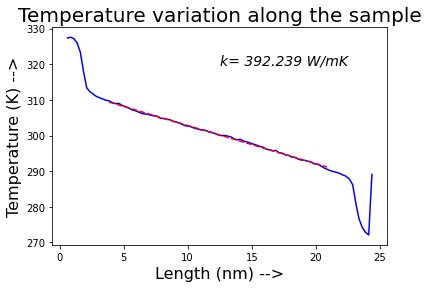

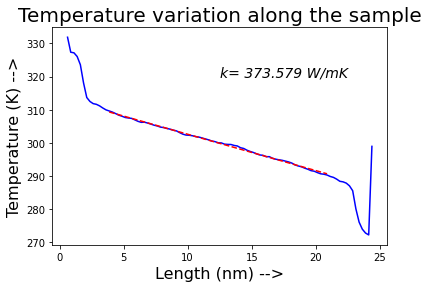

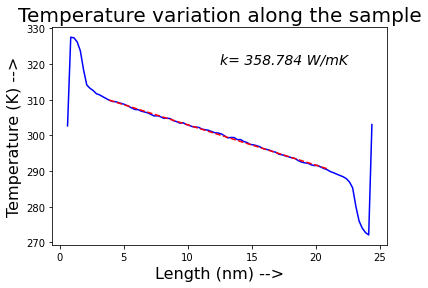

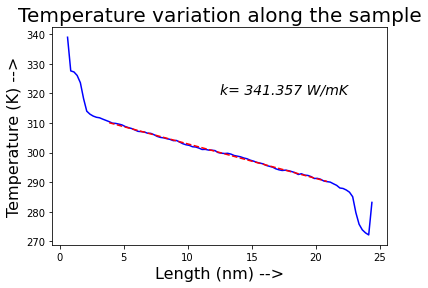

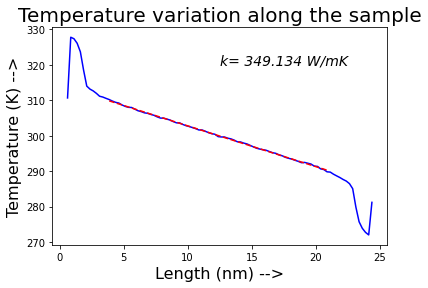

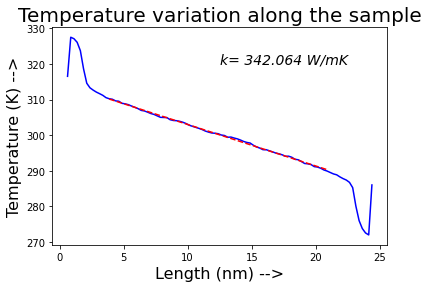

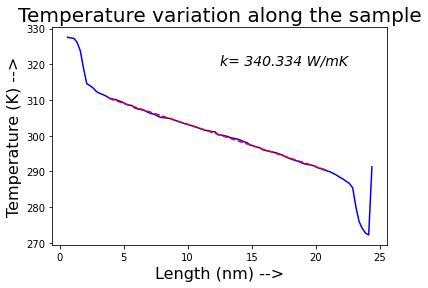

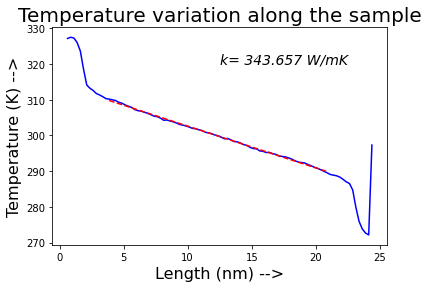

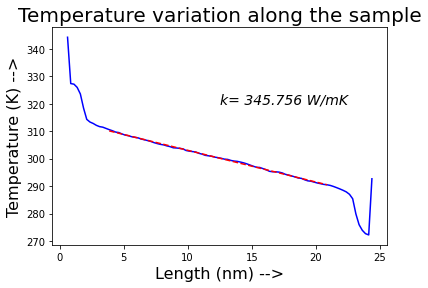

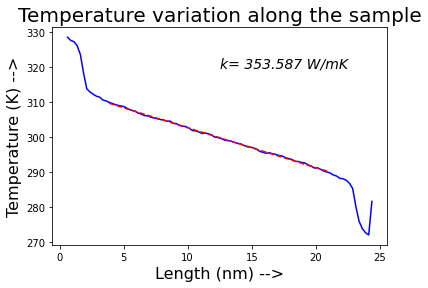

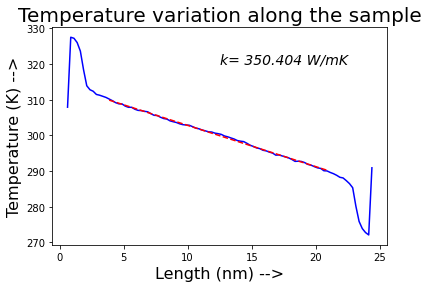

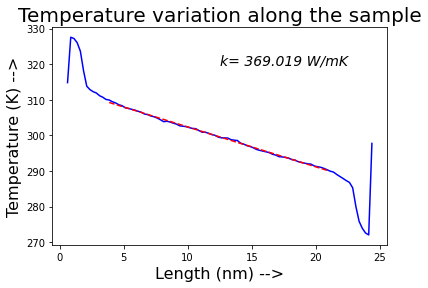

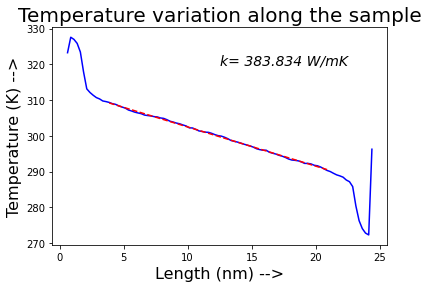

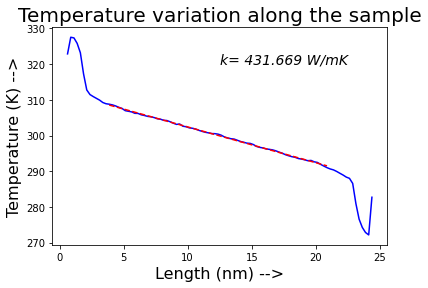

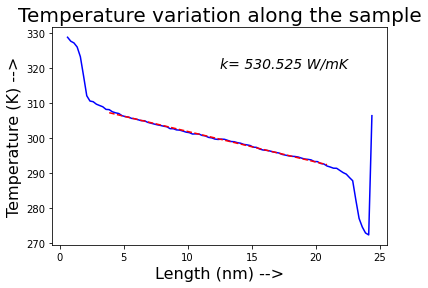

In [25]:
K=[]

for i in range(len(time)):
    th = theta[i]
    [X,T]= Readfile("bilayer_profile.%d.langevin" %th)
    X2 = (Lx[i])*np.array(X) * (10**9)
    X3 = (Lx[i])*np.array(X) * (10**9)
    T=np.array(T)
    a1=2
    a2=15
    b2=84
    b1=98
    X3 = X3 [a1:b1]
    T3= T [a1:b1]
    X1 = X2[a2:b2]
    T1= T[a2:b2]
    l1 = np.polyfit(X1, T1, 1)
    line1=l1[1]+l1[0]*X1
    area=2*z*Ly[i]
    slope = abs (l1[0])*(10**(9))
    k = (0.5 *(abs(Qin[i])+Qout[i]))/((area)*(time[i])*(slope))
    
    plt.figure(i)
    plt.plot(X3,T3, "b")
    plt.plot(X1, line1, '--r')
    plt.xlabel("Length (nm) -->",fontsize=16)
    plt.ylabel("Temperature (K) -->",fontsize=16)
    plt.title("Temperature variation along the sample", fontsize=20)
    #plt.suptitle("Thermostat=Langevin & Boundary = F P P", fontsize=16)
    plt.text(12.5, 320, 'k= %4.3f W/mK' % k, style='italic', fontsize=14)
    plt.savefig("th.jpg",dpi=150)
    plt.show()
    
    K.append(k)

In [26]:
K_arm = K
K_zig = [656.1100156776324,499.80531180353387, 455.47315404615875, 414.5459311717825, 400.38904830839664, 395.49575433334695, 383.4072312248606, 381.0265517993201, 381.26842000972135,381.18387006987047, 385.1042884093875, 384.00218618550934,389.69116398859563, 395.73861431866334, 432.61271013811074, 471.3227082266563]

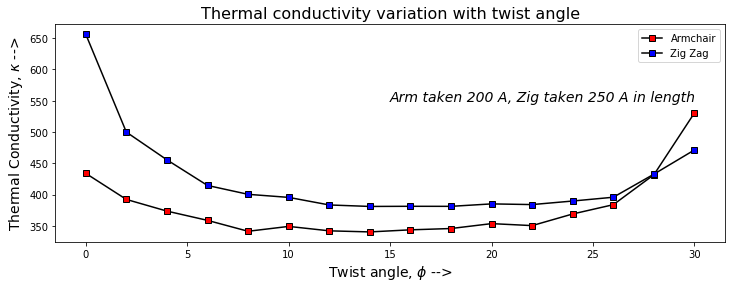

In [27]:
plt.figure(figsize=(12,4))
plt.plot(theta,K_arm,'-ks', mfc='red')
plt.plot(theta,K_zig,'-ks', mfc='blue')
plt.xlabel("Twist angle, $\phi$ -->",fontsize=14)
plt.ylabel("Thermal Conductivity, $\kappa$ -->", fontsize=14)
plt.title("Thermal conductivity variation with twist angle",fontsize=16)
plt.text(15, 550, 'Arm taken 200 A, Zig taken 250 A in length', style='italic', fontsize=14)
plt.legend(["Armchair", "Zig Zag"])
plt.show()